In [1]:
import pandas as pd

In [2]:
df1 = pd.read_csv('day_pnl.csv')
df2 = pd.read_csv('india_vix.csv')

In [3]:
df1.head()

,date,day_pnl,year_month
0,31-12-2021,89.10,2021-12
1,03-01-2022,527.80,2022-01
2,04-01-2022,-179.85,2022-01
3,05-01-2022,312.95,2022-01
4,06-01-2022,120.50,2022-01


In [4]:
len(df1)

185

In [6]:
df2.head()

,Date,Open,High,Low,Close,Prev. Close,Change,% Change
0,31-12-2021,16.5650,16.7675,15.4000,16.2225,16.5650,-0.34,-2.07
1,03-01-2022,16.2225,16.8100,15.4525,16.4525,16.2225,0.23,1.42
2,04-01-2022,16.4525,16.6750,15.7100,16.1200,16.4525,-0.33,-2.02
3,05-01-2022,16.1200,17.3800,15.0875,17.2275,16.1200,1.11,6.87
4,06-01-2022,17.2275,18.4175,16.4000,17.9775,17.2275,0.75,4.35


In [8]:
vix = ["a"]*185
df1['vix'] = vix

In [9]:
df1.head()

,date,day_pnl,year_month,vix
0,31-12-2021,89.10,2021-12,a
1,03-01-2022,527.80,2022-01,a
2,04-01-2022,-179.85,2022-01,a
3,05-01-2022,312.95,2022-01,a
4,06-01-2022,120.50,2022-01,a


In [10]:

for i in range(len(df1['date'])):
    date = df1['date'][i]
    try:
        df1['vix'][i] = (df2[df2['Date '] == date]['Close '].values[0])
    except:
        print(date)

<ipython-input-10-0b9dabe206e4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['vix'][i] = (df2[df2['Date '] == date]['Close '].values[0])


14-11-2022


In [25]:
df1.to_csv("day_pnl_and_vix.csv")

PermissionError: [Errno 13] Permission denied: 'day_pnl_and_vix.csv'

In [26]:
data = pd.read_csv("day_pnl_and_vix.csv")

In [27]:
data.head()

,Unnamed: 0,date,day_pnl,per_lot,year_month,vix,Unnamed: 6,day
0,0,31-12-2021,89.10,2227.50,2021-12,16.2225,NaN,Friday
1,1,03-01-2022,527.80,13195.00,2022-01,16.4525,NaN,Monday
2,2,04-01-2022,-179.85,-4496.25,2022-01,16.1200,NaN,Tuesday
3,3,05-01-2022,312.95,7823.75,2022-01,17.2275,NaN,Wednesday
4,4,06-01-2022,120.50,3012.50,2022-01,17.9775,NaN,Thursday


In [28]:
sum_by_day = data.groupby('day').sum()

In [29]:
sum_by_day

,Unnamed: 0,day_pnl,per_lot,vix,Unnamed: 6
day,,,,,
Friday,3715,1986.65,49666.25,748.3525,0.0
Monday,3124,963.85,24096.25,705.8335,0.0
Thursday,3745,14965.20,374130.00,758.4275,0.0
Tuesday,3148,-962.05,-24051.25,711.2300,0.0
Wednesday,3288,-553.45,-13836.25,715.1150,0.0


In [39]:
sum_by_day.index

Index(['Friday', 'Monday', 'Thursday', 'Tuesday', 'Wednesday'], dtype='object', name='day')

In [34]:
sum_by_day['per_lot']

day
Friday        49666.25
Monday        24096.25
Thursday     374130.00
Tuesday      -24051.25
Wednesday    -13836.25
Name: per_lot, dtype: float64

In [35]:
import matplotlib.pyplot as plt
import numpy as np

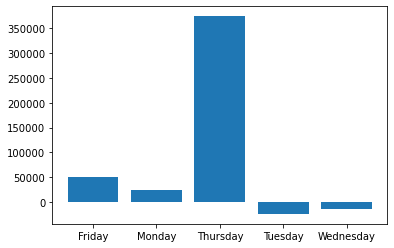

In [40]:
plt.bar(sum_by_day.index,sum_by_day['per_lot'])
plt.show() 

<BarContainer object of 5 artists>

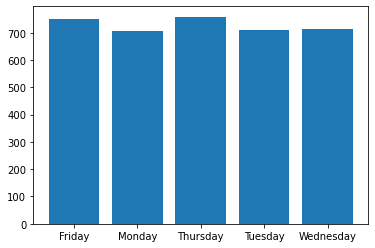

In [41]:
plt.bar(sum_by_day.index,sum_by_day['vix'])

In [42]:
data = pd.read_csv("day_pnl_and_vix.csv")

In [48]:
data.head()

,Unnamed: 0,date,day_pnl,per_lot,year_month,vix,Unnamed: 6,day
0,0,31-12-2021,89.10,2227.50,2021-12,16,NaN,Friday
1,1,03-01-2022,527.80,13195.00,2022-01,16,NaN,Monday
2,2,04-01-2022,-179.85,-4496.25,2022-01,16,NaN,Tuesday
3,3,05-01-2022,312.95,7823.75,2022-01,17,NaN,Wednesday
4,4,06-01-2022,120.50,3012.50,2022-01,18,NaN,Thursday


In [51]:
len(data)

185

In [52]:
sum_by_vix = data.groupby('vix').sum()

In [58]:
sum_by_vix.head()

,Unnamed: 0,day_pnl,per_lot,Unnamed: 6
vix,,,,
13,184,145.40,3635.00,0.0
14,720,17.35,433.75,0.0
15,891,671.50,16787.50,0.0
16,861,2138.35,53458.75,0.0
17,2010,3064.85,76621.25,0.0


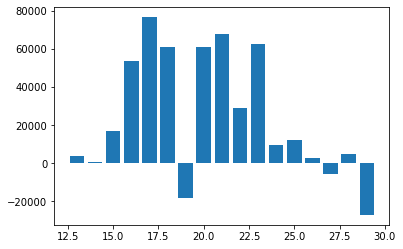

In [61]:
plt.bar(sum_by_vix.index,sum_by_vix['per_lot'])
plt.show() 